2023-07-14

## 1.housing data 불러오기

In [1]:
# 지난 글 말미의 load_housing_data 메서드를 load_housing_data.py 파일로 분리해놓고, 불러온다.
from functions import load_housing_data
housing = load_housing_data.load()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## 기초 구조 확인

### info(): 데이터 기초 정보 확인
- 데이터에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수를 확인하는데 유용하다.

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


#### info() 정보 해석
- 확인 결과 샘플은 20640개
- total_bedrooms 특성은 20433개의 non-null 값을 가지고 있다고 나온다 > 나머지 207개는 null 값이라는 뜻!
- ocean_proximity만 빼고 모두 숫자형이다. (ocean_proximity는 텍스트형이므로 나중에 따로 빼서 살펴보자)
- ocean_proximity 필드는 아마 범주형(categorical)일 것 같은데, value_counts() 메서드로 확인해보면 정확하다

#### object 타입 필드 확인

In [3]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

확인 결과, 5가지로 분류하는 범주형 데이터이다.

### describe(): 숫자형 특성의 통계 정보를 확인
- 알아서 숫자형 특성만 골라 통계정보를 보여준다

In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## 히스토그램을 통한 데이터 형태 파악

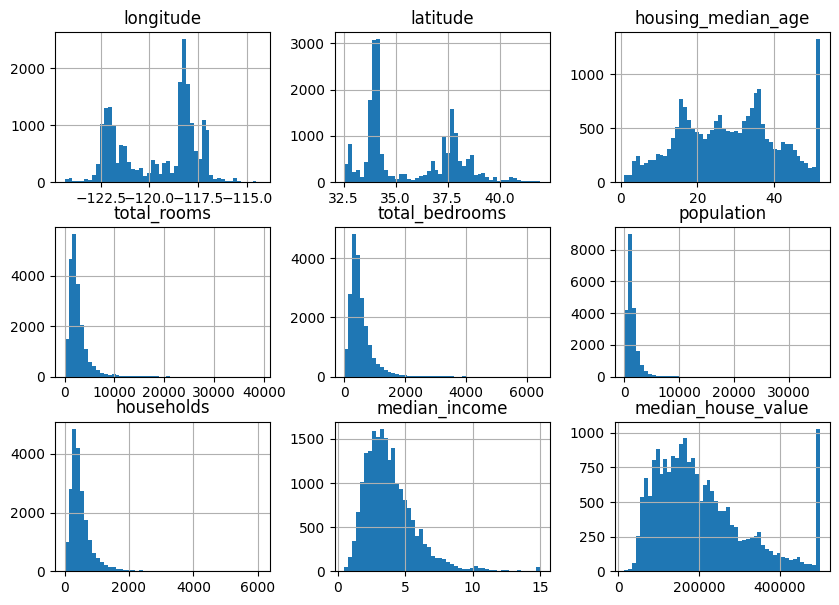

In [5]:
import matplotlib.pyplot as plt
# hist() 메서드는 모든 숫자형 특성의 히스토그램을 그린다.
housing.hist(bins=50, figsize=(10,7))
plt.show()

### 확인된 사항
1. 중간 소득(median income)은 USD가 아닌 것으로 파악된다: 확인해보니 0.5 ~ 15 사이의 값으로 스케일이 조정되었다고 한다. 전처리가 된 셈이니 큰 문제가 되지는 않는다
2. 중간 주택 연도(housing median age)와 중간 주택 가격(median house value) 역시 최댓값과 최솟값을 한정했다.
  - 중간 주택 가격은 타깃(레이블)이기 때문에 50만달러에서 한곗값이 설정되어 있는 것은 큰 문제다.
  - 50만을 넘어가더라도 정확한 예측값이 필요하다고 클라이언트가 요구한다면 선택할 수 있는 방법은 두 가지다
    - 한곗값 밖의 구역에 대한 정확한 레이블을 구한다
    - 훈련 세트와 테스트 세트에서 50만 이상짜리를 제거한다
3. 특성들의 스케일이 서로 많이 다르다
4. 많은 히스토그램의 꼬리가 두껍다. 가운데에서 왼쪽보다 오른쪽으로 더 멀리 뻗어 있다. 이런 형태는 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 만든다. 이 특성들을 좀 더 종 모양의 분포가 되도록 변형시키는 것이 좋다.

## data snooping bias 피하기
- 데이터를 자세히 살펴보기 전에 테스트 세트를 떼어놓아야 한다!!
- 가장 과대적합되기 쉬운 것은 인간의 뇌다. 테스트 세트의 모양을 보고 "아 요건 지수함수 모양을 따르나보네, 이 알고리즘을 선택하자" 하는 식으로 특정 머신러닝 모델을 선택해버릴 수도 있다.
- 이를 data snooping bias라고 하며, 아주 많이 발생하는 편향이다.